<a href="https://colab.research.google.com/github/AsadBukhari886/foundations_of_artificial_neural_network/blob/main/Class_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

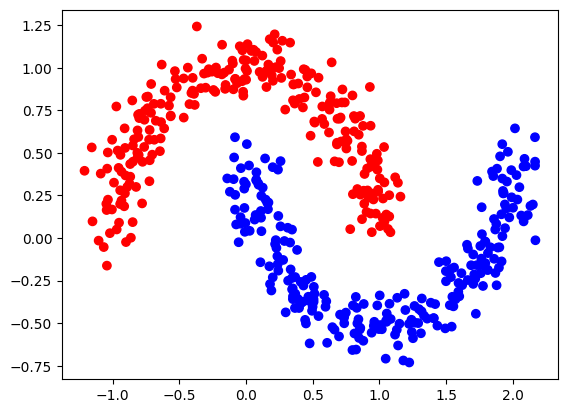

In [ ]:
X, y = make_moons(n_samples=500, noise=0.10, random_state=42)
X = X.astype(np.float32)
y = y.astype(np.float32).reshape(-1, 1)

plt.scatter(X[:,0], X[:, 1], c=y, cmap = 'bwr_r')

In [ ]:
def sigmoid(z):
  return 1 / (1+ np.exp(-z))


def BCELoss(y_hat, y):
  eps = 1e-6
  return - np.mean(y * np.log(y_hat +eps) + (1-y) * np.log(1 - y_hat + eps))


def relu(z):
  return np.maximum(z, 0)


def relu_backward(dl, z):
  return dl * (z > 0).astype(int)

In [ ]:
# n1
w11 = np.random.randn(1,2)
b11 = 0

# n2
w12 = np.random.randn(1,2)
b12 = 0

# n1
w21 = np.random.randn(1,2)
b21 = 0




In [ ]:
# forward

def forward(X):
  z11 = X @ w11.T + b11
  o11 = relu(z11)

  z12 = X @ w12.T + b12
  o12 = relu(z12)

  o = np.hstack((o11, o12))


  z21 = o @ w21.T + b21
  y_hat = sigmoid(z21)

  return y_hat, o, o11, o12, z11, z12






In [ ]:
# # Training/ Backpropagation

lr =0.1
for i in range(5000):
  y_hat, o, o11, o12, z11, z12  = forward(X)
  loss = BCELoss(y_hat, y)


  n = X.shape[0]
  dL = (y_hat - y)/n

  #n3
  dw21 = dL.T @ o
  db21 = np.sum(dL)

# When Activation functoin is relu in hidden layer.
#   # n1
  dL1 = dL * w21[0, 0]
  dL1 = relu_backward(dL1, z11)
  dw1 = dL1.T @ X
  db1 = sum(dL1)


# n2
  dL2 = dL * w21[0, 1]
  dL2 = relu_backward(dL2, z12)
  dw2 = dL2.T @ X
  db2 = sum(dL2)

  w21-=lr* dw21
  b21-=lr* db21

  w11-=lr* dw1
  b11-=lr* db1

  w12-=lr* dw2
  b12-=lr* db2


  if i%100 == 0:
    print(loss)
    # pass

0.7187603621868661
0.6310484834197878
0.3980137365161712
0.3158159732438695
0.285345892951568
0.27149642492471593
0.2641572812666898
0.25974308723761863
0.25684380300752
0.25472048195946767
0.25306972208109735
0.2517190475867397
0.25056436462333453
0.24952514776827162
0.2485755070053556
0.24766235768960182
0.2467827978937796
0.24591616137492664
0.24504814595786034
0.24421339995043007
0.24341081538826365
0.24263027253316263
0.24187940779096112
0.24117152536614664
0.2404951109690169
0.23984717032103056
0.23922661251616267
0.23863736371449992
0.23807206950332965
0.2375309778602431
0.23701193505129292
0.2365147251256285
0.236037167683242
0.23557618508610595
0.2351308687201955
0.2347019246858716
0.23428999398777284
0.23389273478026895
0.23350973900845282
0.233141475812045
0.23278570344837993
0.23244238932259834
0.2321101436896411
0.23178772741446085
0.2314752250090511
0.2311719763750309
0.23087877294710546
0.23059406576851893
0.23031753976552727
0.2300482797700936


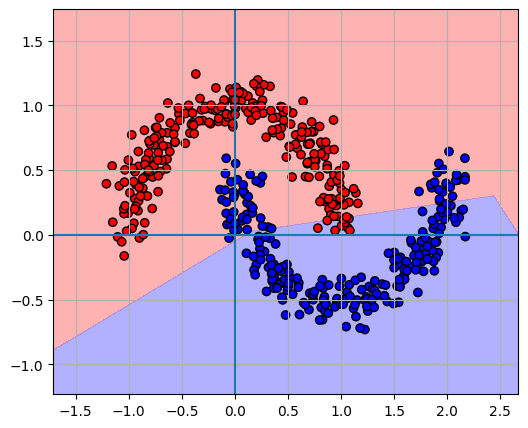

In [ ]:

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

grid = np.c_[xx.ravel(), yy.ravel()]
Z= forward(grid)[0]
Z = Z.reshape(xx.shape)

# ---------------------------
# Plot
# ---------------------------
plt.figure(figsize=(6, 5))

plt.contourf(xx, yy, Z, levels=0, cmap = 'bwr_r', alpha=0.6)
plt.scatter(
    X[:, 0],
    X[:, 1],
    c=y.squeeze(),
    cmap = 'bwr_r',
    edgecolors="k"
)

plt.axhline(0)
plt.axvline(0)
plt.grid(True)
plt.show()

# **Class 16 start from here**


In [ ]:
m = np.random.rand(2,2)
m

array([[0.52772033, 0.71713998],
       [0.95041842, 0.20617409]])

In [ ]:
input_feature = 2


w1 = np.random.randn(2,2)
b1 = np.zeros((1, 2))

w2 = np.random.randn(1, 2)
b2 = np.zeros((1, 1))


In [ ]:
# forward
# X = 500x2, w = 2x2

def forward(X):
  z1 = X @ w1.T + b1
  o1 = relu(z1)

  z2 = o1 @ w2.T + b2
  y_hat = sigmoid(z2)
  return y_hat, o1, z1




In [ ]:
y, o, i = forward(X)
y.shape

(500, 1)

In [ ]:
lr = 0.1

for i in range(1):
  y_hat, o1, z1 = forward(X)
  loss = BCELoss(y_hat, y)


  n = X.shape[0]
  dL = (y_hat - y)/n

  #_____________________________________________________________________________
  # Layer 2 (Output)

  #n3
  # dL = nx1
  # dL.T = 1xn

  # o1 = nx2
  dw2 = dL.T @ o1
  db2 = np.sum(dL, keepdims=True, axis=0)


  # ---------------------Important part --------------------
  # dL = 500x1
  # w2 = 1x2


  dl1 = dL @ w2

  print(dl1.shape)

  #_____________________________________________________________________________
  # Layer 1

  # dl1 = nx2
  # z1 = nx2
  dl1 = relu_backward(dl1, z1)

  # dl1 = 500x2
  # X = 500x2

  # w1 = 2x2
  # dw1 = 2x2
  dw1 = dl1.T @ X
  db1 = np.sum(dl1, keepdims=True, axis=0)

  w2 -= lr* dw2
  b2 -= lr* db2

  w1 -= lr*dw1
  b1 -= lr* db1

  if i%100 ==0:
    print(loss)






(500, 2)
0.7139478678614387


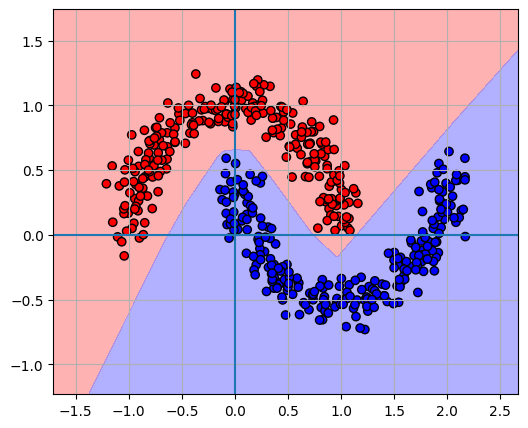

In [ ]:

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

grid = np.c_[xx.ravel(), yy.ravel()]
Z= forward(grid)[0]
Z = Z.reshape(xx.shape)

# ---------------------------
# Plot
# ---------------------------
plt.figure(figsize=(6, 5))

plt.contourf(xx, yy, Z, levels=1, cmap = 'bwr_r', alpha=0.6)
plt.scatter(
    X[:, 0],
    X[:, 1],
    c=y.squeeze(),
    cmap = 'bwr_r',
    edgecolors="k"
)

plt.axhline(0)
plt.axvline(0)
plt.grid(True)
plt.show()